# Classification homework

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [89]:
df = pd.read_csv('course_lead_scoring.csv')

In [90]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [91]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [92]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [93]:
cat_columns = ['lead_source', 'industry', 'employment_status', 'location']
num_columns = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

for col in cat_columns:
    df[col] = df[col].fillna('NA')

for col in num_columns:
    df[col] = df[col].fillna(0.0)

df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

### Question 1

In [132]:
df.industry.mode()

0    retail
Name: industry, dtype: object

### Question 2

                          number_of_courses_viewed  annual_income  \
number_of_courses_viewed                  1.000000       0.009770   
annual_income                             0.009770       1.000000   
interaction_count                        -0.023565       0.027036   
lead_score                               -0.004879       0.015610   

                          interaction_count  lead_score  
number_of_courses_viewed          -0.023565   -0.004879  
annual_income                      0.027036    0.015610  
interaction_count                  1.000000    0.009888  
lead_score                         0.009888    1.000000  


<Figure size 800x600 with 0 Axes>

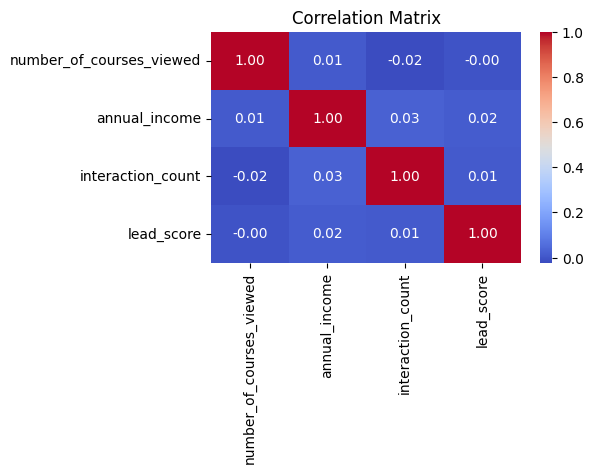

In [133]:
correlation_matrix = df[num_columns].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

annual_income and interaction_count

### Split the data


In [145]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [146]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

### Question 3

In [147]:
from sklearn.metrics import mutual_info_score

for col in cat_columns:
    mi = mutual_info_score(df_train[col], y_train)
    print(f'Mutual Information between {col} and converted: {round(mi, 2)}')

Mutual Information between lead_source and converted: 0.04
Mutual Information between industry and converted: 0.01
Mutual Information between employment_status and converted: 0.01
Mutual Information between location and converted: 0.0


Question 4

In [148]:
for col in cat_columns:
    print('////////////////////////////////////////')
    print(df[col].value_counts())

////////////////////////////////////////
lead_source
organic_search    282
social_media      278
paid_ads          264
referral          260
events            250
NA                128
Name: count, dtype: int64
////////////////////////////////////////
industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64
////////////////////////////////////////
employment_status
self_employed    352
student          348
unemployed       334
employed         328
NA               100
Name: count, dtype: int64
////////////////////////////////////////
location
north_america    225
europe           216
middle_east      198
asia             195
south_america    192
africa           188
australia        185
NA                63
Name: count, dtype: int64


In [149]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

X_train shape: (876, 31)
X_val shape: (293, 31)
X_test shape: (293, 31)


In [150]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [151]:
cat_columns

['lead_source', 'industry', 'employment_status', 'location']

In [152]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

#### Log regression

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [154]:
y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {round(accuracy, 2)}")

Accuracy: 0.7


### Question 5

In [155]:
def data_preparation(df):
    df = df.copy()

    cat_columns = df.select_dtypes(include=['object']).columns.tolist()
    num_columns = df.select_dtypes(exclude=['object']).columns.tolist()

    for col in cat_columns:
        df[col] = df[col].fillna('NA')

    for col in num_columns:
        df[col] = df[col].fillna(0.0)
    
    return df

def data_split(df):
    df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.converted.values
    y_val = df_val.converted.values
    y_test = df_test.converted.values

    del df_train['converted']
    del df_val['converted']
    del df_test['converted']
    
    return df_train, y_train, df_val, y_val, df_test, y_test

def feature_engineering(df_train, df_val, df_test):
    dv = DictVectorizer(sparse=False)

    train_dict = df_train.to_dict(orient='records')
    val_dict = df_val.to_dict(orient='records')
    test_dict = df_test.to_dict(orient='records')

    X_train = dv.fit_transform(train_dict)
    X_val = dv.transform(val_dict)
    X_test = dv.transform(test_dict)
    
    return X_train, X_val, X_test

def train_model(X_train, y_train):
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_val, y_val):
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    return accuracy

drop_columns = ['industry', 'employment_status', 'lead_score']

results = []

for col in drop_columns:
    df_prepared = data_preparation(df.drop(columns=[col]))
    df_train, y_train, df_val, y_val, df_test, y_test = data_split(df_prepared)
    X_train, X_val, X_test = feature_engineering(df_train, df_val, df_test)
    model = train_model(X_train, y_train)
    accuracy = evaluate_model(model, X_val, y_val)
    print(f"Validation Accuracy without {col}: {accuracy}")
    results.append(accuracy)

df_prepared = data_preparation(df)
df_train, y_train, df_val, y_val, df_test, y_test = data_split(df_prepared)
X_train, X_val, X_test = feature_engineering(df_train, df_val, df_test)
model = train_model(X_train, y_train)
accuracy = evaluate_model(model, X_val, y_val)
print(f"Validation Accuracy: {accuracy}")
accuracy_orig = accuracy

results = pd.Series(results)
results.apply(lambda x: x - accuracy_orig)

Validation Accuracy without industry: 0.6996587030716723
Validation Accuracy without employment_status: 0.6962457337883959
Validation Accuracy without lead_score: 0.7064846416382252
Validation Accuracy: 0.6996587030716723


0    0.000000
1   -0.003413
2    0.006826
dtype: float64

industry

### Question 6

In [158]:
C = [0.01, 0.1, 1, 10, 100]

for c in C:
    df_prepared = data_preparation(df)
    df_train, y_train, df_val, y_val, df_test, y_test = data_split(df_prepared)
    X_train, X_val, X_test = feature_engineering(df_train, df_val, df_test)
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    accuracy = evaluate_model(model, X_val, y_val)
    print(f"Validation Accuracy with C={c}: {round(accuracy, 3)}")

Validation Accuracy with C=0.01: 0.7
Validation Accuracy with C=0.1: 0.7
Validation Accuracy with C=1: 0.7
Validation Accuracy with C=10: 0.7
Validation Accuracy with C=100: 0.7


C = 0.01